In [166]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10,CIFAR100
from torchvision.transforms import ToTensor,Normalize
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torch.optim import Adam
%matplotlib inline

In [127]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


# Data Load

In [128]:
dataset_10 = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset_10 = CIFAR10(root='data/', train=False, transform=ToTensor())
dataset_100 = CIFAR100(root='data/', download=True, transform=ToTensor())
test_dataset_100 = CIFAR100(root='data/', download=True, transform=ToTensor())

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [129]:
classes_10=dataset_10.classes
classes_10

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [130]:
classes_10[0]

'airplane'

In [132]:
torch.manual_seed(1)

In [133]:
val_size=10000
train_size=10000
empty_size=30000

In [134]:
train_ds_10, val_ds_10, empty_ds_10 = random_split(dataset_10, [train_size, val_size,empty_size])
len(train_ds_10), len(val_ds_10)

(10000, 10000)

In [136]:
type(train_ds_10)

torch.utils.data.dataset.Subset

In [113]:
#train_ds_10.__getitem__(10)
#train_ds_10[10]

In [137]:
train_ds_10[0][0]

tensor([[[0.3490, 0.3451, 0.3412,  ..., 0.4431, 0.4353, 0.4314],
         [0.3608, 0.3569, 0.3529,  ..., 0.4667, 0.4549, 0.4549],
         [0.3686, 0.3608, 0.3569,  ..., 0.4824, 0.4745, 0.4824],
         ...,
         [0.9255, 0.8588, 0.6471,  ..., 0.3569, 0.3490, 0.3490],
         [0.9882, 0.9333, 0.8902,  ..., 0.7843, 0.8471, 0.8392],
         [1.0000, 0.9922, 1.0000,  ..., 0.8902, 1.0000, 1.0000]],

        [[0.4784, 0.4745, 0.4784,  ..., 0.5647, 0.5608, 0.5647],
         [0.4863, 0.4902, 0.4941,  ..., 0.5922, 0.5804, 0.5882],
         [0.5020, 0.5020, 0.5059,  ..., 0.6196, 0.6118, 0.6118],
         ...,
         [0.9255, 0.8667, 0.6784,  ..., 0.3804, 0.3725, 0.3725],
         [0.9882, 0.9373, 0.8980,  ..., 0.7882, 0.8510, 0.8431],
         [1.0000, 0.9961, 1.0000,  ..., 0.8902, 1.0000, 1.0000]],

        [[0.7020, 0.6941, 0.6980,  ..., 0.7569, 0.7529, 0.7529],
         [0.7137, 0.7098, 0.7098,  ..., 0.7843, 0.7725, 0.7765],
         [0.7255, 0.7216, 0.7216,  ..., 0.7961, 0.7922, 0.

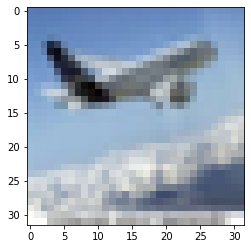

In [162]:
plt.imshow(np.transpose(train_ds_10[0][0],(1,2,0)))

# Input Normalization

In [156]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [157]:
dataset_10_ = CIFAR10(root='data/', download=True, transform=transform)

Files already downloaded and verified


In [158]:
torch.manual_seed(1)

In [159]:
train_ds_10_, val_ds_10_, empty_ds_10_ = random_split(dataset_10_, [train_size, val_size,empty_size])
len(train_ds_10_), len(val_ds_10_)

(10000, 10000)

In [160]:
train_ds_10_[0][0]

tensor([[[-0.3020, -0.3098, -0.3176,  ..., -0.1137, -0.1294, -0.1373],
         [-0.2784, -0.2863, -0.2941,  ..., -0.0667, -0.0902, -0.0902],
         [-0.2627, -0.2784, -0.2863,  ..., -0.0353, -0.0510, -0.0353],
         ...,
         [ 0.8510,  0.7176,  0.2941,  ..., -0.2863, -0.3020, -0.3020],
         [ 0.9765,  0.8667,  0.7804,  ...,  0.5686,  0.6941,  0.6784],
         [ 1.0000,  0.9843,  1.0000,  ...,  0.7804,  1.0000,  1.0000]],

        [[-0.0431, -0.0510, -0.0431,  ...,  0.1294,  0.1216,  0.1294],
         [-0.0275, -0.0196, -0.0118,  ...,  0.1843,  0.1608,  0.1765],
         [ 0.0039,  0.0039,  0.0118,  ...,  0.2392,  0.2235,  0.2235],
         ...,
         [ 0.8510,  0.7333,  0.3569,  ..., -0.2392, -0.2549, -0.2549],
         [ 0.9765,  0.8745,  0.7961,  ...,  0.5765,  0.7020,  0.6863],
         [ 1.0000,  0.9922,  1.0000,  ...,  0.7804,  1.0000,  1.0000]],

        [[ 0.4039,  0.3882,  0.3961,  ...,  0.5137,  0.5059,  0.5059],
         [ 0.4275,  0.4196,  0.4196,  ...,  0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


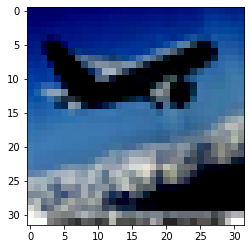

In [161]:
plt.imshow(np.transpose(train_ds_10_[0][0],(1,2,0)))

# Train and Test

In [217]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=9,kernel_size=5,stride=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2)
            )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=9,out_channels=36,kernel_size=5,stride=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2)
            )
        self.layer3 = nn.Sequential(
            nn.Linear(36*5*5, 100),
            nn.ReLU()
            )
        self.layer4 = nn.Linear(100,10)
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0),-1) #Flatten feature mapes to one-dimension vector
        out = self.layer3(out)
        out = self.layer4(out)
        return out
        
    

In [218]:
cnn=MyCNN().to(device) # move to cuda

In [219]:
criterion = nn.CrossEntropyLoss().to(device) # move to cuda
optimizer = Adam(cnn.parameters(), lr=5e-4)

In [220]:
trainloader_10_ = torch.utils.data.DataLoader(dataset=train_ds_10_,
                                          batch_size=50,
                                          shuffle=True,
                                          drop_last=True)

In [221]:
total_batch = len(trainloader_10_)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 200


In [228]:
a=iter(trainloader_10_)

In [235]:
for epoch in range(30): #training epochs
    avg_cost = 0
    
    for X, Y in trainloader_10_: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)
        print(X)
        print(Y)

        optimizer.zero_grad()
        pred = cnn(X)
        print(pred)
        cost = criterion(pred, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

tensor([[[[ 0.4745,  0.4510,  0.4588,  ...,  0.6314,  0.6314,  0.6627],
          [ 0.4667,  0.4275,  0.4667,  ...,  0.6627,  0.6784,  0.7020],
          [ 0.4588,  0.4353,  0.2471,  ...,  0.6627,  0.6863,  0.7255],
          ...,
          [ 1.0000,  0.9922,  1.0000,  ...,  0.9529,  0.9843,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.9922,  1.0000,  1.0000],
          [ 1.0000,  0.9765,  0.9765,  ...,  0.9765,  0.9765,  1.0000]],

         [[ 0.6549,  0.6078,  0.6078,  ...,  0.7412,  0.7490,  0.7882],
          [ 0.6863,  0.6706,  0.5373,  ...,  0.7569,  0.7647,  0.7961],
          [ 0.6784,  0.6549,  0.2000,  ...,  0.7490,  0.7490,  0.7882],
          ...,
          [ 1.0000,  0.9922,  0.9922,  ...,  1.0000,  0.9922,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9765,  0.9765,  ...,  0.9686,  0.9765,  1.0000]],

         [[ 0.8588,  0.8118,  0.8196,  ...,  0.9137,  0.9294,  0.9608],
          [ 0.9059,  0.8588,  

KeyboardInterrupt: 

In [199]:
testloader = torch.utils.data.DataLoader(test_dataset_10, batch_size=10,
                                         shuffle=False, num_workers=2)

In [203]:
cnn(test_dataset_10[0][0])

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [9, 3, 5, 5], but got 3-dimensional input of size [3, 32, 32] instead

In [198]:
correct = 0
total = 0
with torch.no_grad():
    for X,y in testloader:
        outputs = cnn(X)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

AttributeError: 'CIFAR10' object has no attribute 'test_data'